In [1]:
# Notebook authored by Sophie
import numpy as np
import pandas as pd
from matplotlib import pyplot

In [17]:
clinic_ocp_counts = []
# Count how many of each OCP per clinic
for i in range(0,15):
    file_name = "~/Downloads/clinic_datasets_sophie_hormone_generation/clinic_"+str(i)+".csv"
    curr_df = pd.read_csv(file_name)
    clinic_name = "clinic "+str(i)
    row = [clinic_name]
    for j in range(1,11):
        ocp_j_count = list(curr_df.treatment).count(j)
        row.append(ocp_j_count)
    clinic_ocp_counts.append(row)

In [18]:
clinic_ocp_counts

[['clinic 0', 50, 126, 117, 192, 55, 35, 266, 130, 74, 239],
 ['clinic 1', 60, 206, 109, 5, 86, 70, 76, 8, 9, 77],
 ['clinic 2', 151, 40, 209, 201, 129, 185, 213, 84, 17, 130],
 ['clinic 3', 168, 83, 76, 205, 446, 90, 63, 138, 83, 148],
 ['clinic 4', 41, 111, 93, 279, 159, 29, 363, 125, 152, 522],
 ['clinic 5', 165, 173, 118, 90, 84, 62, 131, 84, 194, 53],
 ['clinic 6', 121, 425, 156, 38, 22, 188, 25, 145, 334, 40],
 ['clinic 7', 11, 23, 139, 85, 234, 20, 239, 39, 216, 67],
 ['clinic 8', 131, 124, 225, 33, 218, 53, 166, 223, 59, 62],
 ['clinic 9', 49, 125, 670, 188, 50, 331, 266, 68, 66, 54],
 ['clinic 10', 21, 54, 228, 179, 77, 90, 8, 17, 315, 182],
 ['clinic 11', 158, 173, 15, 220, 39, 214, 250, 67, 88, 83],
 ['clinic 12', 148, 46, 351, 204, 43, 126, 109, 152, 103, 82],
 ['clinic 13', 109, 153, 100, 91, 269, 318, 159, 152, 198, 144],
 ['clinic 14', 270, 199, 98, 39, 240, 187, 279, 169, 123, 364]]

In [19]:
clinic_ocps = pd.DataFrame(clinic_ocp_counts, columns = ["Clinic","OCP 1","OCP 2","OCP 3","OCP 4","OCP 5","OCP 6","OCP 7","OCP 8","OCP 9","OCP 10"])


In [20]:
clinic_ocps

,Clinic,OCP 1,OCP 2,OCP 3,OCP 4,OCP 5,OCP 6,OCP 7,OCP 8,OCP 9,OCP 10
0,clinic 0,50,126,117,192,55,35,266,130,74,239
1,clinic 1,60,206,109,5,86,70,76,8,9,77
2,clinic 2,151,40,209,201,129,185,213,84,17,130
3,clinic 3,168,83,76,205,446,90,63,138,83,148
4,clinic 4,41,111,93,279,159,29,363,125,152,522
5,clinic 5,165,173,118,90,84,62,131,84,194,53
6,clinic 6,121,425,156,38,22,188,25,145,334,40
7,clinic 7,11,23,139,85,234,20,239,39,216,67
8,clinic 8,131,124,225,33,218,53,166,223,59,62
9,clinic 9,49,125,670,188,50,331,266,68,66,54


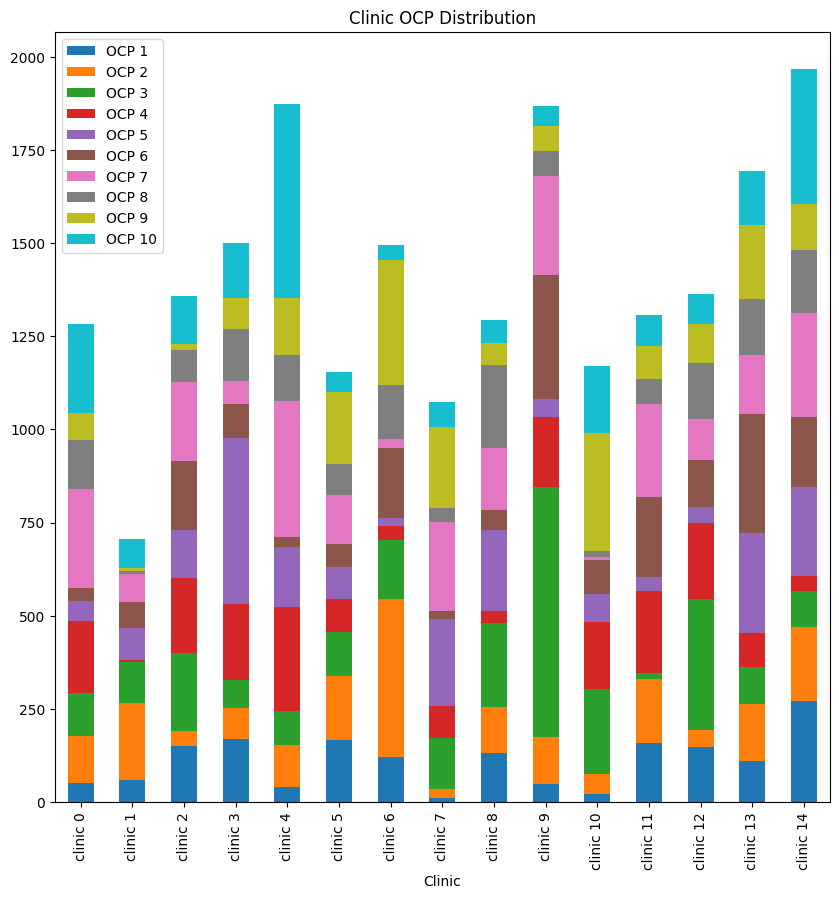

In [25]:
plot = clinic_ocps.plot.bar(x='Clinic', stacked=True, title='Clinic OCP Distribution',figsize=(10,10))
plot.get_figure().savefig('clinic_ocp_dist.png')

In [26]:
curr_df.columns

Index(['lh_fsh_ratio', 'estradiol', 'testosterone', 'progesterone_17oh',
       'dheas', 'androstenedione', 'amh', 'irreg_menstr', 'cysts', 'hirsutism',
       'acne', 'anxiety', 'depression', 'treatment', 'response_type'],
      dtype='object')

In [31]:
# Create a dictionary of hormone name to hormone patient values 
hormones = {
    "lh_fsh_ratio" : [],
    "estradiol" : [],
    "testosterone" : [],
    "progesterone_17oh" : [],
    "dheas" : [],
    "androstenedione" : [],
    "amh" : []
}
for i in range(0,15):
    file_name = "~/Downloads/clinic_datasets_sophie_hormone_generation/clinic_"+str(i)+".csv"
    curr_df = pd.read_csv(file_name)
    for hormone in hormones.keys():
        hormones[hormone].extend(curr_df[hormone].values)

In [39]:
# Calculate statistics for each hormone distribution
for hormone, dist in hormones.items():
    print("***************")
    print(hormone)
    print(np.min(dist))
    print(np.mean(dist))
    print(np.max(dist))
    print("***************")

***************
lh_fsh_ratio
0.0
1.702165827214371
3.5534659047542645
***************
***************
estradiol
25.76020029146743
87.33551918019306
146.52233183744585
***************
***************
testosterone
2.457692674190234
72.8483958482391
141.83008539682973
***************
***************
progesterone_17oh
0.0
1.666025106594196
3.824523082233858
***************
***************
dheas
0.0
1182.8070864832896
3672.621796203322
***************
***************
androstenedione
0.0
5.781631897042825
15.52451526487542
***************
***************
amh
0.0
77.10711214296747
165.36729398312772
***************


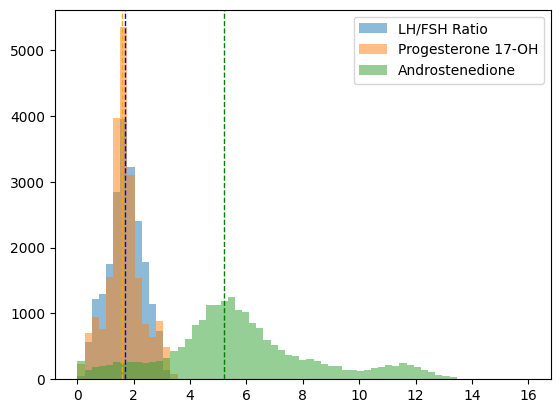

In [46]:
bins = np.linspace(0, 16, 64)
pyplot.hist(hormones["lh_fsh_ratio"], bins, alpha=0.5, label="LH/FSH Ratio")
pyplot.hist(hormones["progesterone_17oh"], bins, alpha=0.5, label="Progesterone 17-OH")
pyplot.hist(hormones["androstenedione"], bins, alpha=0.5, label="Androstenedione")
# True means from study
pyplot.axvline(1.7, color="blue", linestyle='dashed', linewidth=1)
pyplot.axvline(1.6, color="orange", linestyle='dashed', linewidth=1)
pyplot.axvline(5.2, color="green", linestyle='dashed', linewidth=1)
pyplot.legend(loc='upper right')
pyplot.show()

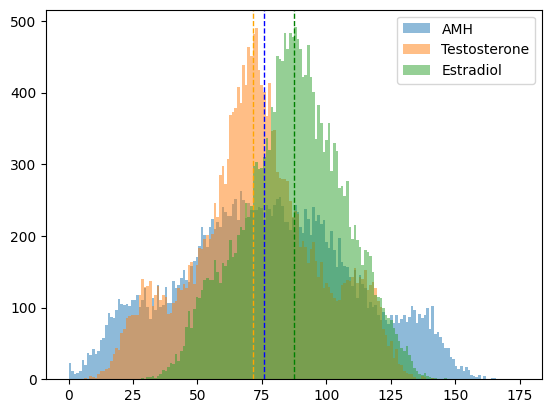

In [48]:
bins = np.linspace(0, 175, 175)
pyplot.hist(hormones["amh"], bins, alpha=0.5, label="AMH")
pyplot.hist(hormones["testosterone"], bins, alpha=0.5, label="Testosterone")
pyplot.hist(hormones["estradiol"], bins, alpha=0.5, label="Estradiol")
# True means from study
pyplot.axvline(76.0, color="blue", linestyle='dashed', linewidth=1)
pyplot.axvline(71.4, color="orange", linestyle='dashed', linewidth=1)
pyplot.axvline(87.6, color="green", linestyle='dashed', linewidth=1)
pyplot.legend(loc='upper right')
pyplot.show()

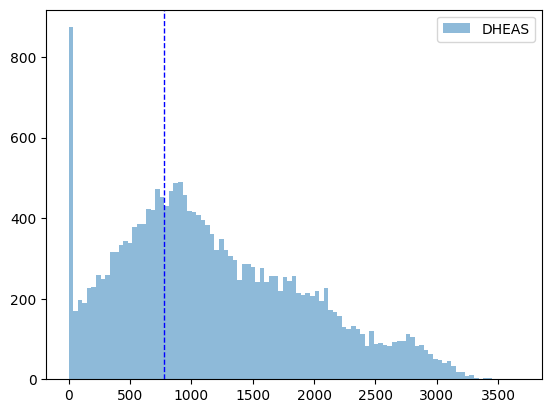

In [49]:
bins = np.linspace(0, 3675, 100)
pyplot.hist(hormones["dheas"], bins, alpha=0.5, label="DHEAS")
# True mean from study
pyplot.axvline(775.0, color="blue", linestyle='dashed', linewidth=1)
pyplot.legend(loc='upper right')
pyplot.show()

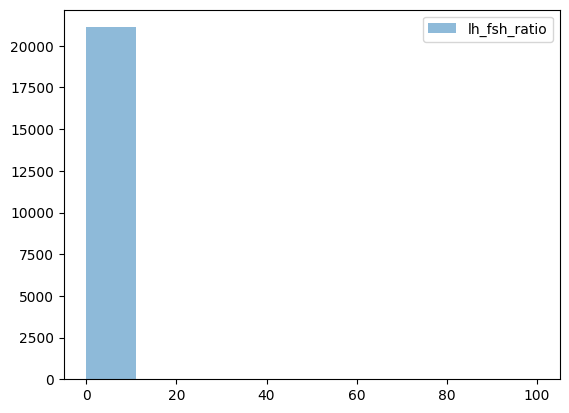

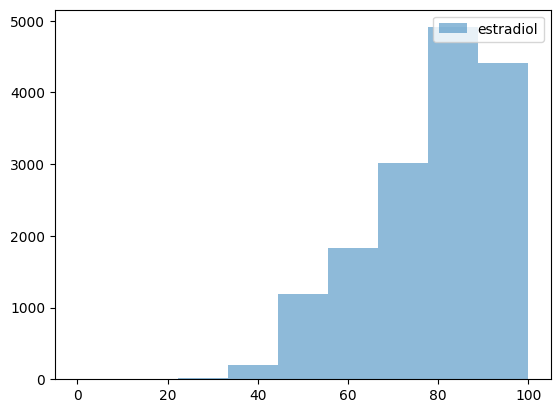

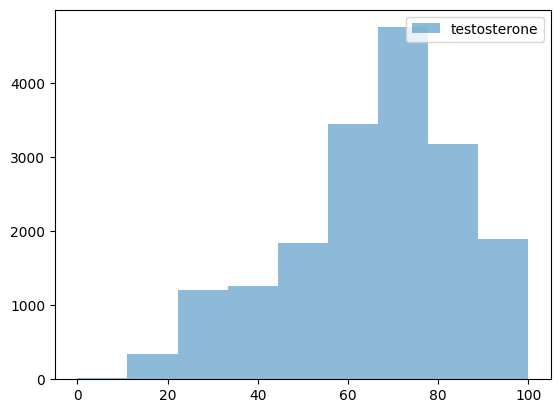

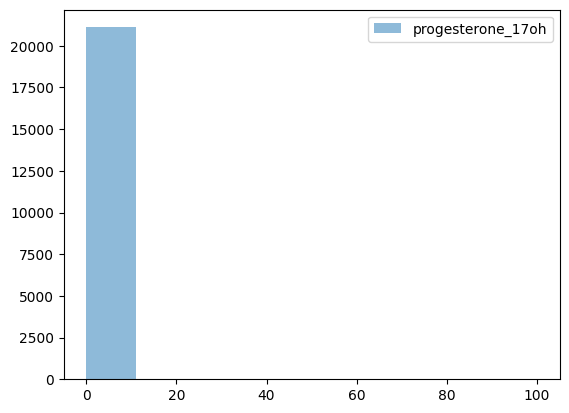

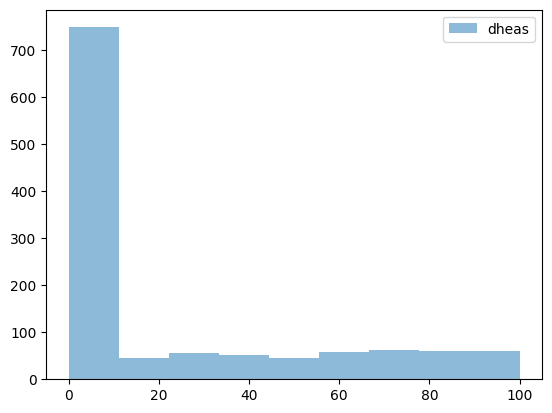

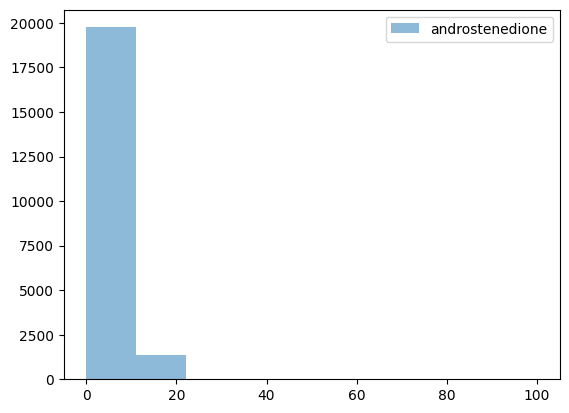

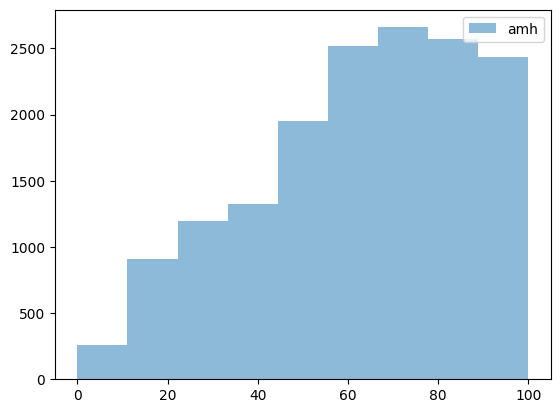

In [37]:
bins = np.linspace(0, 100, 10)
# Visualize distribution of each hormone in entire patient population
for hormone, dist in hormones.items():
    pyplot.hist(dist, bins, alpha=0.5, label=hormone)
    pyplot.legend(loc='upper right')
    pyplot.show()

In [ ]:
# The below code visualizes hormone distribution ranges based on OCP and patient response type

In [50]:
# Aggregate all the clinics into one dataset
df = pd.read_csv("~/Downloads/clinic_datasets_sophie_hormone_generation/clinic_0.csv")

for i in range(1,15):
    file_name = "~/Downloads/clinic_datasets_sophie_hormone_generation/clinic_"+str(i)+".csv"
    curr_df = pd.read_csv(file_name)
    df = pd.concat([df, curr_df])

In [51]:
df

,lh_fsh_ratio,estradiol,testosterone,progesterone_17oh,dheas,androstenedione,amh,irreg_menstr,cysts,hirsutism,acne,anxiety,depression,treatment,response_type
0,0.852875,69.404651,37.249088,1.193503,91.298718,5.562547,53.361913,0,1,2,0,0,0,1,1
1,0.862117,74.635459,48.026282,0.676553,548.471882,2.996807,37.855591,1,2,1,0,0,0,1,1
2,1.037645,73.195011,53.695967,1.143424,672.317520,2.397739,40.953058,1,1,1,0,0,0,1,1
3,1.297838,59.084527,37.001392,1.270365,879.254107,2.273987,28.527521,1,1,1,1,1,1,1,1
4,1.023792,60.904895,46.490605,1.112884,605.364421,3.357514,38.385804,2,1,1,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1963,0.655137,59.907964,27.335124,0.791908,214.541809,0.831551,26.875232,1,2,1,0,1,2,10,10
1964,0.530728,53.664615,36.491543,0.503312,65.181572,1.103260,10.645666,1,0,2,0,1,0,10,10
1965,0.344524,51.725101,27.684611,0.547546,319.281599,1.990619,23.276164,1,1,1,0,1,0,10,10
1966,0.652052,63.428595,40.655940,0.627136,236.561112,1.202081,30.274302,1,2,2,0,1,0,10,10


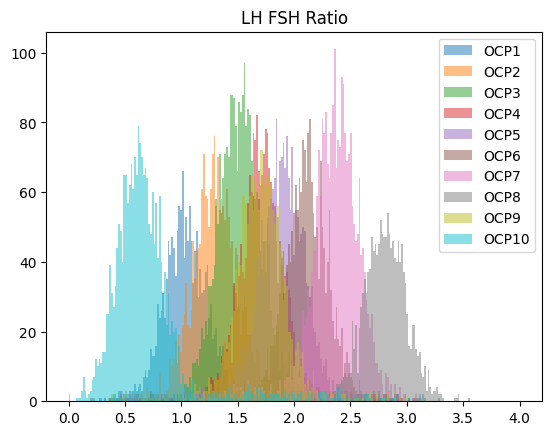

In [64]:
import matplotlib.pyplot as plt
bins = np.linspace(0,4,256)
# Plot the hormone value distribution for each OCP
for i in range(1,11):
    plt.hist(df.loc[df["treatment"]==i,"lh_fsh_ratio"],bins=bins,alpha=0.5,label="OCP"+str(i))
plt.legend()
plt.title("LH FSH Ratio")
plt.show()

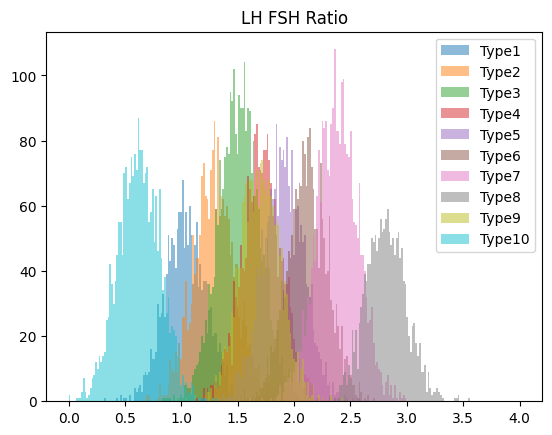

In [66]:
import matplotlib.pyplot as plt
bins = np.linspace(0,4,256)
# Plot the hormone range distribution for each response type
for i in range(1,11):
    plt.hist(df.loc[df["response_type"]==i,"lh_fsh_ratio"],bins=bins,alpha=0.5,label="Type"+str(i))
plt.legend()
plt.title("LH FSH Ratio")
plt.show()

In [ ]:
# The below cells visualize the proportion of symptoms for each patient response type

In [8]:
# Aggregate the data from all the clinics
df2 = pd.read_csv("~/Downloads/clinic_datasets_sophie_hormone_generation_NO_MASKING/clinic_0.csv")

for i in range(1,15):
    file_name = "~/Downloads/clinic_datasets_sophie_hormone_generation_NO_MASKING/clinic_"+str(i)+".csv"
    curr_df = pd.read_csv(file_name)
    df2 = pd.concat([df2, curr_df])

In [9]:
df2

,lh_fsh_ratio,estradiol,testosterone,progesterone_17oh,dheas,androstenedione,amh,irreg_menstr,cysts,hirsutism,acne,anxiety,depression,treatment,response_type
0,0.852875,69.404651,37.249088,1.193503,91.298718,5.562547,53.361913,0.0,1.0,0.0,0.0,0.0,1.0,1,1
1,0.862117,74.635459,48.026282,0.676553,548.471882,2.996807,37.855591,1.0,1.0,1.0,0.0,0.0,0.0,1,1
2,1.037645,73.195011,53.695967,1.143424,672.317520,2.397739,40.953058,1.0,1.0,1.0,0.0,0.0,0.0,1,1
3,1.297838,59.084527,37.001392,1.270365,879.254107,2.273987,28.527521,1.0,1.0,1.0,0.0,1.0,1.0,1,1
4,1.023792,60.904895,46.490605,1.112884,605.364421,3.357514,38.385804,1.0,1.0,1.0,1.0,1.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1963,0.655137,59.907964,27.335124,0.791908,214.541809,0.831551,26.875232,1.0,0.0,1.0,0.0,1.0,1.0,10,10
1964,0.530728,53.664615,36.491543,0.503312,65.181572,1.103260,10.645666,1.0,0.0,1.0,0.0,1.0,0.0,10,10
1965,0.344524,51.725101,27.684611,0.547546,319.281599,1.990619,23.276164,1.0,1.0,1.0,0.0,1.0,0.0,10,10
1966,0.652052,63.428595,40.655940,0.627136,236.561112,1.202081,30.274302,1.0,1.0,1.0,0.0,1.0,0.0,10,10


In [13]:
# Calculate proportion of patients with each symptom per response type
symptom_counts = []
symptoms = ["irreg_menstr","cysts","hirsutism","acne","anxiety","depression"]
# For each response type
for i in range(1,11):
    type_name = i
    curr_df = df2.loc[df2['response_type'] == i]
    row = [type_name]
    # For each symptom
    for j in range(len(symptoms)):
        symp = symptoms[j]
        prop = sum(curr_df[symp] == 1)/len(curr_df)
        row.append(prop)
    symptom_counts.append(row)

In [61]:
symptom_df = pd.DataFrame(symptom_counts, columns = ["Response Type","Oligomenorrhea","Cysts","Hirsutism","Acne","Anxiety","Depression"])
symptom_df = symptom_df.drop("Response Type",axis=1)

In [62]:
symptom_df

,Oligomenorrhea,Cysts,Hirsutism,Acne,Anxiety,Depression
0,0.786600,0.747519,0.712159,0.165012,0.344293,0.556452
1,0.799901,0.706058,0.716981,0.193148,0.265641,0.566038
2,0.797654,0.766129,0.751466,0.248534,0.538490,0.358138
3,0.798082,0.734293,0.811511,0.322302,0.338609,0.421103
4,0.787594,0.738722,0.716635,0.293703,0.210996,0.382989
5,0.802078,0.742702,0.653637,0.241959,0.305789,0.372093
6,0.832263,0.711749,0.687949,0.242917,0.009067,0.516056
7,0.801648,0.756654,0.743346,0.226236,0.434728,0.425222
8,0.804734,0.776134,0.835306,0.355030,0.673077,0.250000
9,0.788266,0.751654,0.848258,0.220997,0.412439,0.613586


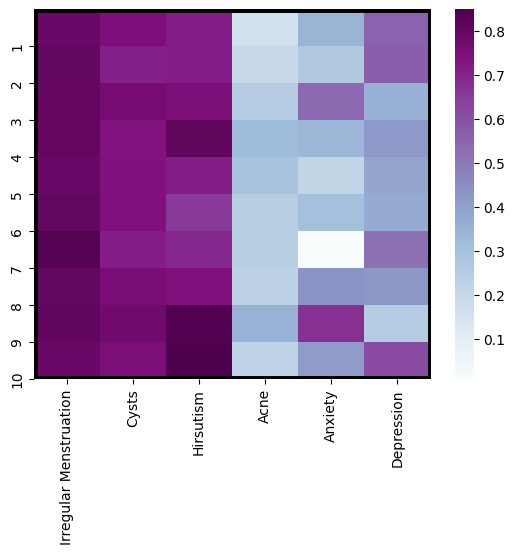

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure()
ax = sns.heatmap(symptom_df,annot=False,cmap="BuPu")
ax.axhline(y=0,color="black",linewidth=5)
ax.axhline(y=10,color="black",linewidth=5)
ax.axvline(x=0,color="black",linewidth=5)
ax.axvline(x=6,color="black",linewidth=5)
plt.yticks(range(1,11),labels=range(1,11))
plt.show()

In [55]:
symptom_df.shape

(10, 6)

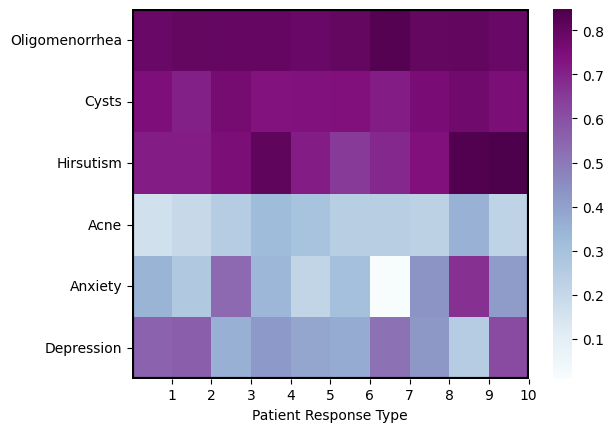

In [71]:
patient_response_types = range(1,11)

plt.figure()
ax = sns.heatmap(symptom_df.transpose(),annot=False,cmap="BuPu")
# Create border around heat map
ax.axhline(y=0,color="black",linewidth=3)
ax.axhline(y=6,color="black",linewidth=3)
ax.axvline(x=0,color="black",linewidth=3)
ax.axvline(x=10,color="black",linewidth=3)
# Add patient response type labels
plt.xticks(patient_response_types,labels=patient_response_types)
plt.xlabel("Patient Response Type")
plt.show()